# 🩺 Análisis Exploratorio de Costos de Seguros Médicos de Estados Unidos

Este proyecto tiene como objetivo principal realizar un **Análisis Exploratorio de Datos (EDA)** sobre un conjunto de datos de costos de seguros médicos en EE. UU.

El análisis busca identificar qué variables demográficas y de estilo de vida tienen el **mayor impacto en los cargos (charges)** de seguros, simulando el rol de un analista de datos para una aseguradora.

## Metas del Proyecto

El alcance (scope) se limita a responder las siguientes preguntas clave:

1.  **Impacto del Tabaquismo:** ¿Cuál es la diferencia promedio en costos entre fumadores y no fumadores?
2.  **Edad vs. Costo:** ¿Cómo se relaciona la edad con el aumento de los costos médicos?
3.  **BMI y Factores de Riesgo:** ¿Existe una interacción entre un alto Índice de Masa Corporal (BMI) y el hábito de fumar que impulse los costos?
4.  **Distribución Geográfica:** ¿Existen disparidades significativas en los costos promedio entre las cuatro regiones (Northeast, Southeast, Southwest, Northwest)?

---

## 1. Configuración, Importación de Librerías y Carga de Datos

Usaremos las librerías pandas, numpy y matplotlib para la manipulación, análisis y visualización de los datos.

In [3]:
import pandas as pd             # Manipulación y análisis de datos
import numpy as np              # Operaciones numéricas
import matplotlib.pyplot as plt # Visualización de datos

## 2. Análisis Inicial del Dataset

Esta sección confirma la estructura del dataset, verifica los tipos de datos y asegura que no existan valores faltantes que requieran imputación, garantizando que el conjunto de datos esté "limpio" y listo para el análisis estadístico.

In [4]:
df = pd.read_csv(r'G:\PyCharm\Análisis Exploratorio de Costos de Seguros Médicos de Estados Unidos\Dataset\insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


## Análisis profundo

In [6]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### 2.3 Análisis Detallado de Distribución

El análisis de `df.describe()` reveló que las variables `charges` y `bmi` tienen distribuciones sesgadas (skewed), con una **media significativamente mayor que la mediana (Q2 o 50%)**. Para manejar correctamente este sesgo, **almacenare la media, la mediana y la desviación estándar (std)** de estas columnas en variables separadas.

In [66]:
charges_mean = df['charges'].mean()
charges_std = df['charges'].std()
charges_median = df['charges'].median()
print(f"Para los cargos al seguro medico estado unidense, el promedio es de {charges_mean:.2f}$, con una mediana de {charges_median:.2f}$ y con una desviación estandar de {charges_std:.2f}$")

Para los cargos al seguro medico estado unidense, el promedio es de 13270.42$, con una mediana de 9382.03$ y con una desviación estandar de 12110.01$


Axes(0.125,0.11;0.775x0.77)


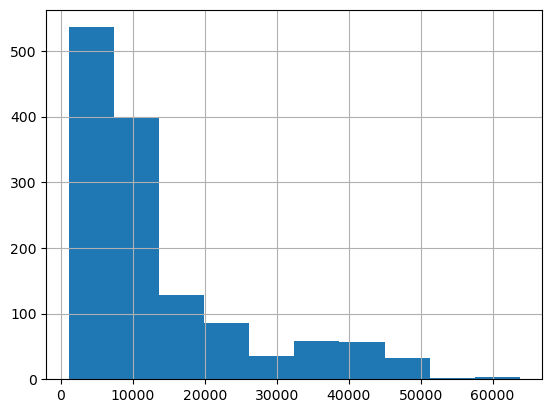

In [62]:
print(df['charges'].hist())

In [67]:
age_mean = df['age'].mean()
age_std = df['age'].std()
age_median = df['age'].median()
print(f"El conjunto de los datos de edad, arrojan que la edad promedio es de {age_mean:.2f} años, a igual que la mediana es de {age_median} años una desviación estandar de {age_std:.2f} años")

El conjunto de los datos de edad, arrojan que la edad promedio es de 39.21 años, a igual que la mediana es de 39.0 años una desviación estandar de 14.05 años


Axes(0.125,0.11;0.775x0.77)


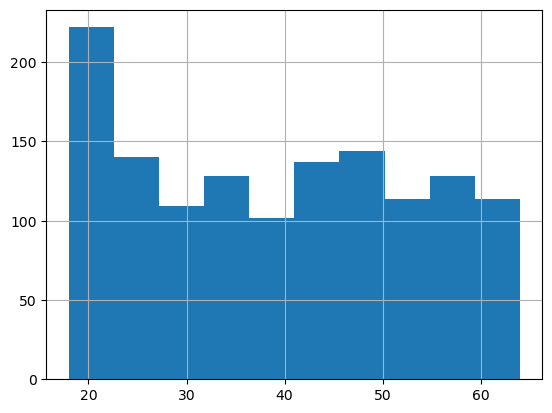

In [64]:
print(df['age'].hist())

In [70]:
bmi_mean = df['bmi'].mean()
bmi_std = df['bmi'].std()
bmi_median = df['bmi'].median()
print(f"El conjunto de los datos de bmi, arrojan que el bmi promedio es de {bmi_mean:.2f} kg/m*m, a igual que la mediana es de {bmi_median} kg/m*m una desviación estandar de {bmi_std:.2f} kg/m*m")

El conjunto de los datos de bmi, arrojan que el bmi promedio es de 30.66 kg/m*m, a igual que la mediana es de 30.4 kg/m*m una desviación estandar de 6.10 kg/m*m


Axes(0.125,0.11;0.775x0.77)


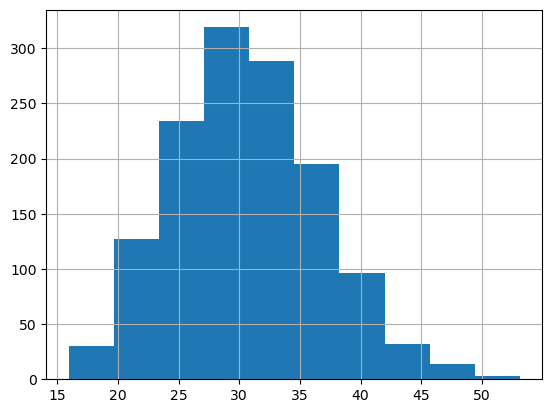

In [65]:
print(df['bmi'].hist())

Despues de revisar las variables numéricas y guardar los datos que nos podrian ser utiles para otras pruebas, podemos empezar a revisar nuestras variables categoricas, la edad, el genero y los fumadores.

In [42]:
sex = df['sex'].value_counts()
print(sex)

sex
male      676
female    662
Name: count, dtype: int64


In [56]:
smokers = df['smoker'].value_counts()
print(smokers)

smoker
no     1064
yes     274
Name: count, dtype: int64


In [55]:
smoker = smokers.loc['yes']
col_smoker = len(df['smoker'])
smokers_rate = (smoker/col_smoker) * 100
print(f"Un {smokers_rate:.1f}% de las personas son fumadores")

Un 20.5% de las personas son fumadores


In [41]:
regions = df['region'].value_counts()
print(regions)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## Conclusiones del Análisis Exploratorio Inicial

### Observaciones sobre Variables Categóricas

* **Género:** Tenemos una distribución bastante equitativa entre ambos generos, ambos generos representados en un 50% aproximadamente.
* **Fumadores:** El dataset está desbalanceado, con una mayoría significativa de no fumadores donde hay un 20.5% de fumadores.
* **Regiones:** La distribución geográfica es bastante equitativa entre las 4 regiones, lo que sugiere que la muestra es representativa geográficamente.

### Observaciones sobre Variables Numéricas

* **Edad:** La distribución es bastante uniforme en todos los rangos de edad, aunque se observa un pico significativo en el grupo de adultos jóvenes (18-19 años). La media (39.2) y la mediana (39.0) son casi idénticas, lo que indica una distribución simétrica sin sesgos importantes.

* **BMI (Índice de Masa Corporal):** Los datos siguen una **distribución normal (forma de campana)**. El promedio (30.66) y la mediana (30.40) son extremadamente cercanos. Esto facilita el análisis estadístico.

* **Cargos (Charges):** Como se predijo, esta es la variable más crítica. Muestra un **fuerte sesgo positivo (hacia la derecha)**.
    * La mayoría de los cargos se concentran por debajo de los 10,000 USD.
    * Existe una "cola larga" de valores altos que llega hasta los 63,000 USD.
    * La gran diferencia entre el promedio (13,270) y la Mediana (9,382) confirma que hay un grupo pequeño de pacientes con costos extremadamente altos que inflan el promedio.

---